In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-ptbr/imdb-reviews-pt-br.csv


# Inicializando os dados

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import tokenize
import seaborn as sns
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron

True

In [3]:
resenha = pd.read_csv('/kaggle/input/imdb-ptbr/imdb-reviews-pt-br.csv')
resenha.head(9)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg


In [4]:
resenha.shape

(49459, 4)

In [5]:
print("Negativa\n")
print(resenha.text_pt[180])

Negativa

Havia muitos westerns assustadores feitos nos anos 30 e início dos 40, e embora isso tenha um começo forte, não é um deles. Randy Bowers John Wayne parando em um salão da Halfway House, descobre que ele está cheio de cadáveres, o cadáver do barman pendurado sobre a barra segurando uma arma, olhos observando Randy por trás de buracos cortados através dos olhos em uma foto e um piano tocando " A mais bela noite do ano ". Foi o resultado de um assalto da gangue Marvin Black, para que Ed Rogers recebesse US $ 30.000. Randy é um investigador que "trabalha sozinho", que perde pouco tempo sendo preso, fugindo com a ajuda da filha de Eds, Sallys, e literalmente pousando no meio do esconderijo das gangues negras atrás de uma cachoeira. Tudo se move bem rápido. Apenas uma perseguição em demasia depois de Randy diminuir a velocidade. Até pegamos George Hayes, barbeado e tocando duas partes - Marvin Black, o mais vil vilão, assim como o Bom Cidadão, Matt, o Mudo, que se comunica via mens

In [6]:
print("Positiva\n")
print(resenha.text_pt[49003])

Positiva

Uau! Eu tenho visto tantos filmes ruins de baixo orçamento ultimamente, mas esse é ótimo. O retrato muito realista da vida policial em uma cidade na costa da Alemanha Oriental é um forte contraste com outros filmes de crime ou séries. Eu amava a atriz principal e a rejeição absoluta de qualquer clichê predominante sobre a polícia. Este filme é realista como uma documentação e divertido como um drama ao mesmo tempo. Uma troca perfeita!


In [7]:
resenha.sentiment.value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

# Pré-processamentos


In [8]:
classe = resenha['sentiment'].replace(['neg','pos'], [0,1])
resenha['classe'] = classe
resenha

/tmp/ipykernel_17/3653856993.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classe = resenha['sentiment'].replace(['neg','pos'], [0,1])


,id,text_en,text_pt,sentiment,classe
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [9]:
vetorizar = CountVectorizer(lowercase = False, max_features=50)
bow = vetorizar.fit_transform(resenha.text_pt)
bow.shape

(49459, 50)

max_features: define tamanho do vetor para cada resenha(input), ou seja, ele verifica as 50 palavras que mais aparecem na resenha para montar vetores menores e melhor computacionalmente

# Classificação de sentimento

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(bow,
                                               resenha.classe,
                                               random_state = 42)

regressao = LogisticRegression()
regressao.fit(xtrain, ytrain)
acc = regressao.score(xtest, ytest)
print(acc)

0.6583097452486858


## Função para classificação 

In [11]:
def classification_text(text, column_text, column_class):
    vetorizar = CountVectorizer(lowercase = False, max_features=100)
    bow = vetorizar.fit_transform(text[column_text])

    xtrain, xtest, ytrain, ytest = train_test_split(bow,
                                               text[column_class],
                                               random_state = 42)

    regressao = LogisticRegression(solver ='lbfgs')
    regressao.fit(xtrain, ytrain)
    return regressao.score(xtest, ytest)

print(classification_text(resenha, 'text_pt', 'classe'))

0.7014152850788516


In [12]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
words = ' '.join([text for text in resenha.text_pt])
len(words)

63448424

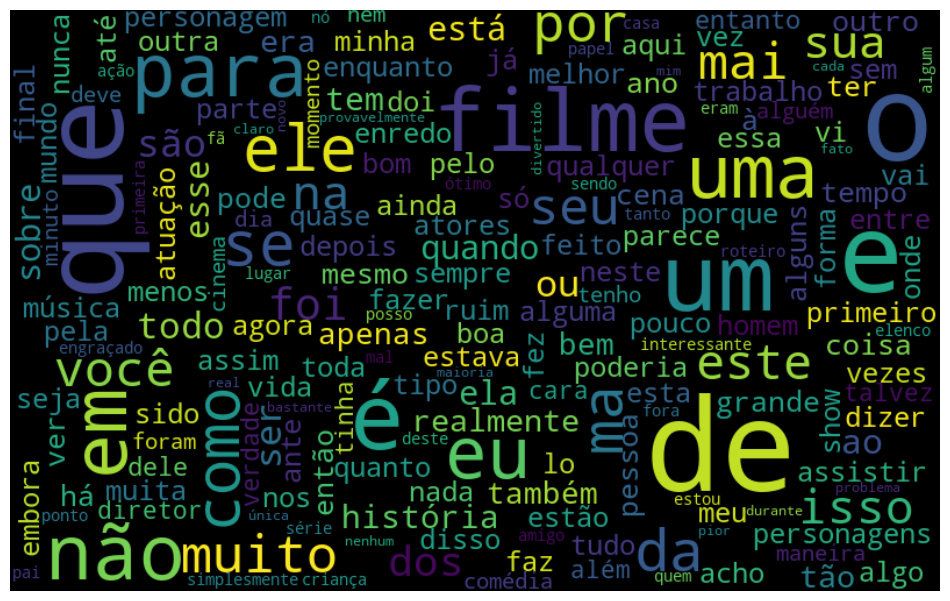

In [14]:
cloud_word = WordCloud(width = 800, height=500,
                      max_font_size=110, collocations=False).generate(words)

plt.figure(figsize=(12,9))
plt.imshow(cloud_word, interpolation='bilinear')
plt.axis('off')
plt.show()

inicialmente o objetivo é verificar apenas a frequência de palavras e não os bigramas (collocation=False)

## Função para segmentar palavras pos e neg

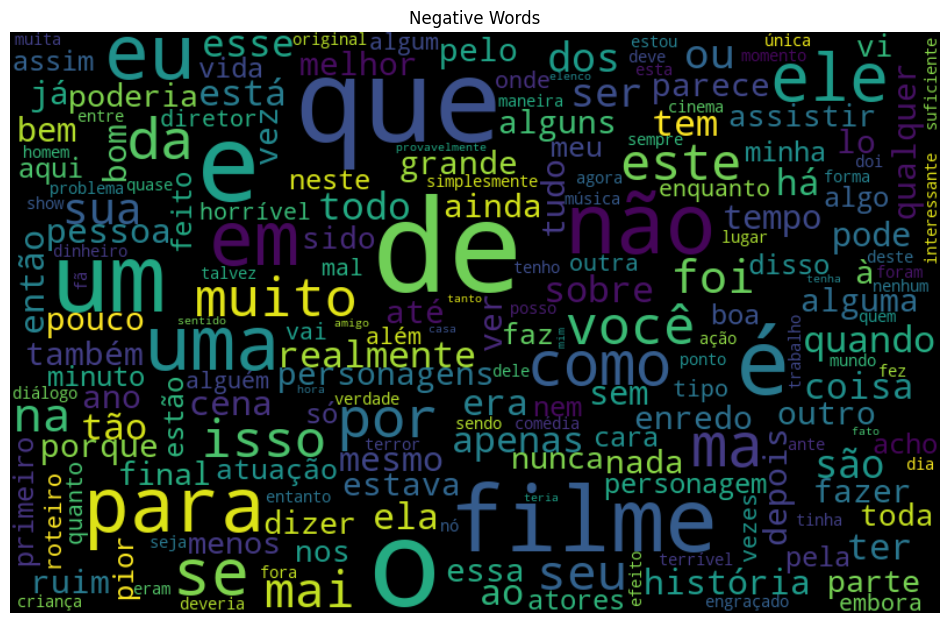

In [15]:
def cloud_negative_words(text, column_text):
    text_neg = text.query("sentiment == 'neg'")
    words = ' '.join([text for text in text_neg[column_text]])
    cloud_word = WordCloud(width = 800, height=500,
                          max_font_size=110, collocations=False).generate(words)
    
    plt.figure(figsize=(12,9))
    plt.imshow(cloud_word, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Words')
    plt.show()

def cloud_positive_words(text, column_text):
    text_pos = text.query("sentiment == 'pos'")
    words = ' '.join([text for text in text_pos[column_text]])
    cloud_word = WordCloud(width = 800, height=500,
                          max_font_size=110, collocations=False).generate(words)
    
    plt.figure(figsize=(12,9))
    plt.imshow(cloud_word, interpolation='bilinear')
    plt.axis('off')
    plt.title('Positive Words')
    plt.show()

cloud_negative_words(resenha, 'text_pt')

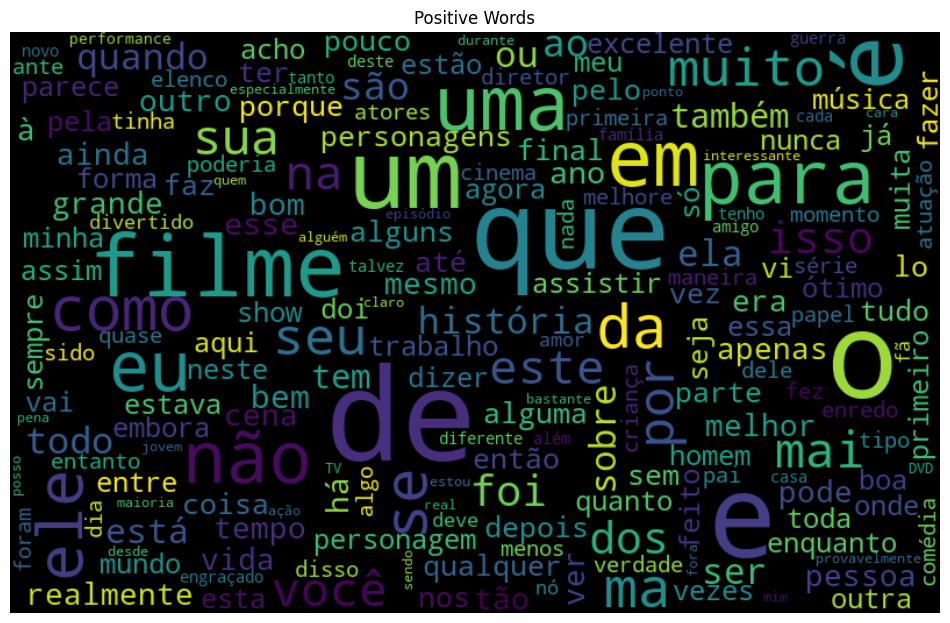

In [16]:
cloud_positive_words(resenha, 'text_pt')

In [17]:
token_space = tokenize.WhitespaceTokenizer()
token_phrase = token_space.tokenize(words)
frequency = nltk.FreqDist(token_phrase)
frequency

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

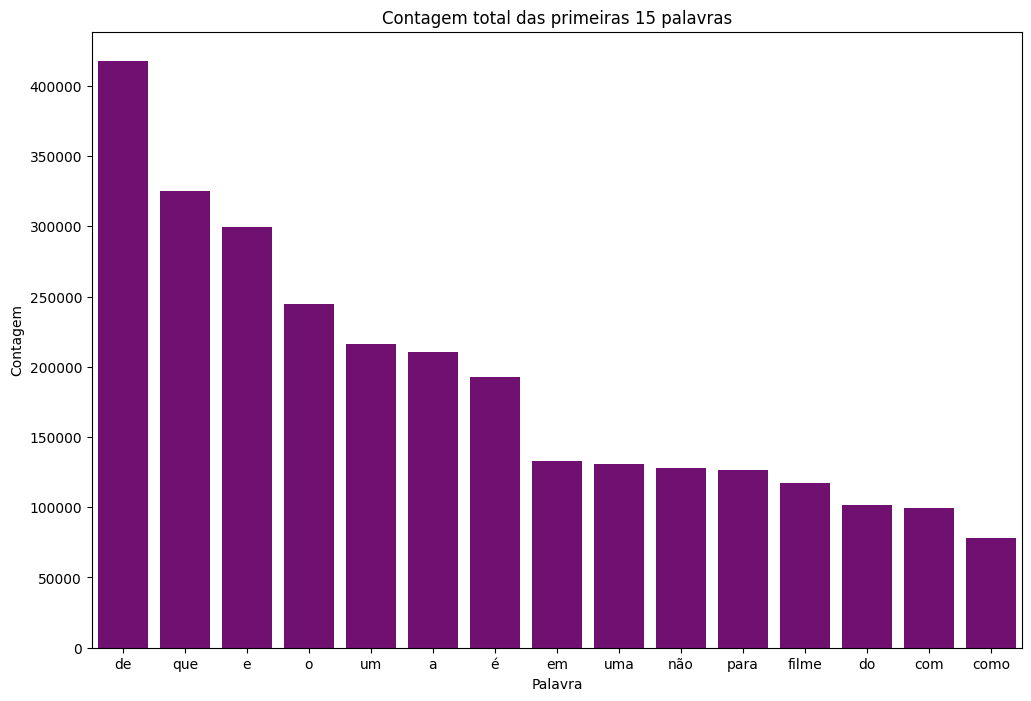

In [18]:
def pareto(text, column_text, qnt):
    words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(words)
    frequency = nltk.FreqDist(token_phrase)
    
    df_frequency = pd.DataFrame({'Palavra': list(frequency.keys()),
                                'Frequency': list(frequency.values())})
    frequency_df = df_frequency.nlargest(columns = 'Frequency', n = qnt)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data= frequency_df, 
                     x='Palavra', y='Frequency', color='purple')
    ax.set(ylabel='Contagem')
    plt.title('Contagem total das primeiras 15 palavras')
    plt.show()

pareto(resenha, 'text_pt', 15)

In [19]:
df_frequency = pd.DataFrame({'Palavra': list(frequency.keys()),
                            'Frequency': list(frequency.values())})

df_frequency.nlargest(columns = 'Frequency', n = 15)

,Palavra,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


## Tratamento das stopwords

In [20]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [21]:
phrase_process = list()

for _ in resenha.text_pt:
    new_phrase = list()
    word_text = token_space.tokenize(_)
    for word in word_text:
        if word not in stop_words:
            new_phrase.append(word)
    phrase_process.append(' '.join(new_phrase))

resenha['tratamento_1'] = phrase_process

resenha.head()

,id,text_en,text_pt,sentiment,classe,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [22]:
classification_text(resenha, 'tratamento_1', 'classe')

0.7111200970481197

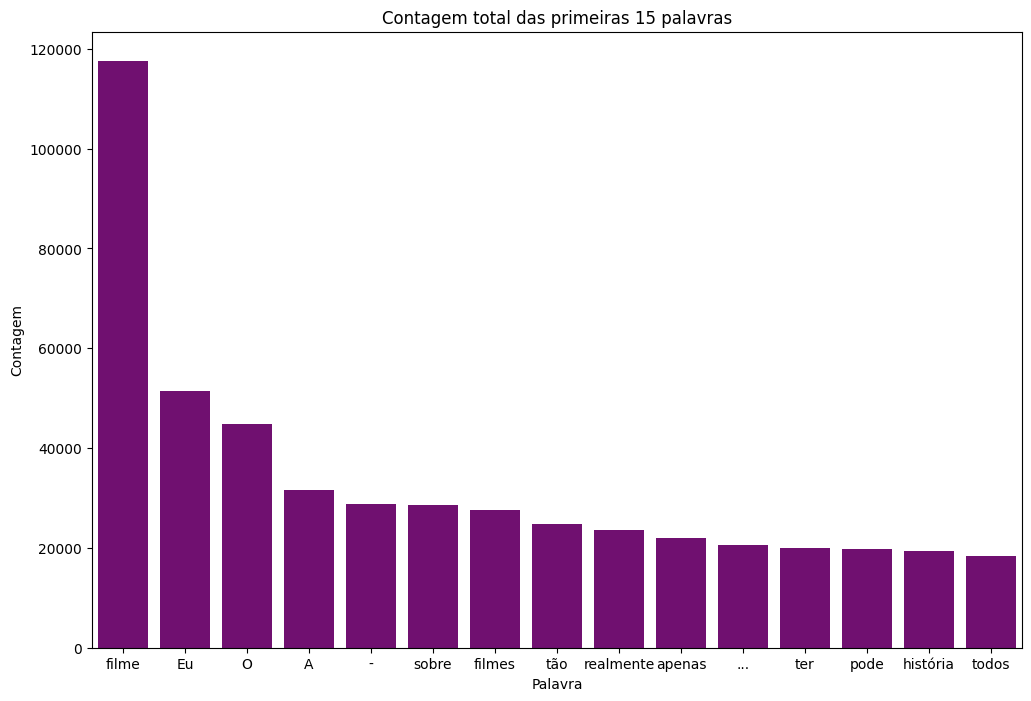

In [23]:
pareto(resenha, 'tratamento_1', 15)

## Melhorando os tokens, separando pontuação 

Nesse caso algumas palavras estão ficando com valor diferente por conta da pontuação. Exemplo: 'ótimo,' e 'ótimo!'. O certo é dividir a pontuação . e , para não diferenciar esses dois tokens.

Necessário retirar acentos também.

In [24]:
from string import punctuation

token_pont = tokenize.WordPunctTokenizer()

pont = list()
for _ in punctuation:
    pont.append(_)

pont_stopwords = pont + stop_words

phrase_process = list()
for _ in resenha['tratamento_1']:
    new_phrase = list()
    phrase_text = token_pont.tokenize(_)
    for word in phrase_text:
        if word not in pont_stopwords:
            new_phrase.append(word)
    phrase_process.append(' '.join(new_phrase))

resenha['tratamento_2'] = phrase_process

resenha.head()

,id,text_en,text_pt,sentiment,classe,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [25]:
resenha['tratamento_1'][45]

'O cineasta permaneceu fiel relato preciso história publicada 1894, inclui manuscrito 1846 Richard Williams Bell, filho John Lucy Bell, irmão novo Betsy Bell intitulado "Our Family Trouble". Para conhecimento, único relato testemunha ocular escrito. O cineasta deve creditado precisão, pouco dizer sobre qualidade produção atuação. A atuação teatral qualidade som imagem extremamente ruim. Parece cineasta simplesmente filmou cenas eventos relatados ocorreram incorporá-los inseri-los enredo enredo fluente. Se precisa conhecer história, leia sobre ela, emocionante conclusivo.'

In [26]:
resenha['tratamento_2'][45]

'O cineasta permaneceu fiel relato preciso história publicada 1894 inclui manuscrito 1846 Richard Williams Bell filho John Lucy Bell irmão novo Betsy Bell intitulado Our Family Trouble ". Para conhecimento único relato testemunha ocular escrito O cineasta deve creditado precisão pouco dizer sobre qualidade produção atuação A atuação teatral qualidade som imagem extremamente ruim Parece cineasta simplesmente filmou cenas eventos relatados ocorreram incorporá los inseri los enredo enredo fluente Se precisa conhecer história leia sobre emocionante conclusivo'

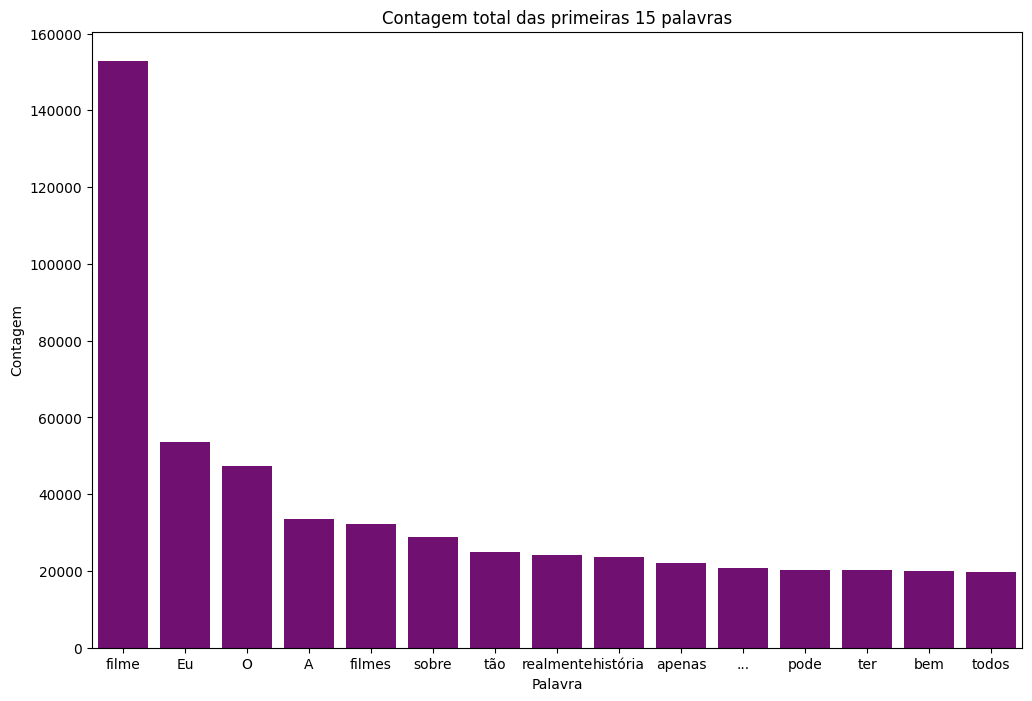

In [27]:
pareto(resenha, 'tratamento_2', 15)

In [28]:
import unidecode

no_accents = [unidecode.unidecode(text) for text in resenha['tratamento_2']]

stopwords_no_accents = [unidecode.unidecode(text) for text in pont_stopwords]
stopwords_no_accents

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

Retirando palavras irrelevantes sem acento que não foram removidas anteriormente por falta de pontuação.

In [29]:
resenha['tratamento_3'] = no_accents

phrase_process = list()
for _ in resenha['tratamento_3']:
    new_phrase = list()
    phrase_text = token_pont.tokenize(_)
    for word in phrase_text:
        if word not in pont_stopwords:
            new_phrase.append(word)
    phrase_process.append(' '.join(new_phrase))

resenha['tratamento_3'] = phrase_process

In [30]:
acc_tratamento3 = classification_text(resenha, 'tratamento_3', 'classe')
print(acc_tratamento3)

0.7086130206227255


In [31]:
phrase_process = list()
for _ in resenha['tratamento_3']:
    new_phrase = list()
    _ = _.lower()
    phrase_text = token_pont.tokenize(_)
    for word in phrase_text:
        if word not in stopwords_no_accents:
            new_phrase.append(word)
    phrase_process.append(' '.join(new_phrase))

resenha['tratamento_4'] = phrase_process

In [32]:
resenha['text_pt'][20]

'A melhor coisa sobre "The Prey" é o slogan ... "Não é humano e tem um machado"! O filme em si é um stinkaroo acolchoado ... intermináveis \u200b\u200bfotos de insetos e vida selvagem fazem o espectador querer morrer! Nenhum fã de slasher vai gostar desse lixo ..... Assista "Friday the 13th" novamente e grave qualquer cópia deste filme que você encontrar! Também é considerado um dos 25 piores filmes já feitos!'

In [33]:
resenha['tratamento_4'][20]

'melhor coisa sobre the prey slogan ... humano machado "! filme si stinkaroo acolchoado ... interminaveis fotos insetos vida selvagem fazem espectador querer morrer nenhum fa slasher vai gostar desse lixo ..... assista friday the 13th novamente grave qualquer copia deste filme encontrar considerado 25 piores filmes feitos'

In [34]:
acc_tratamento4 = classification_text(resenha, 'tratamento_3', 'classe')
print(acc_tratamento4)

0.7086130206227255


In [35]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('correria')

'corr'

In [36]:
phrase_process = list()
for _ in resenha['tratamento_4']:
    new_phrase = list()
    phrase_text = token_pont.tokenize(_)
    for word in phrase_text:
        new_phrase.append(stemmer.stem(word))
    phrase_process.append(' '.join(new_phrase))

resenha['tratamento_5'] = phrase_process

acc_tratamento5 = classification_text(resenha, 'tratamento_5', 'classe')
acc_tratamento5

0.7463809138697938

## Utilizando Tf-idf e Ngrams

Vetorizar as frases de uma maneira melhor com pesos para cada frequência 

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Dados originais
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
caract = tfidf.fit_transform(resenha['text_pt'])

xtrain, xtest, ytrain, ytest = train_test_split(caract,
                                                resenha['classe'],
                                                random_state = 42)
regressao.fit(xtrain, ytrain)
acc_tfidf = regressao.score(xtest, ytest)

print(acc_tfidf)

0.6600889607763849


In [38]:
#Dados tratados
caract_tratadas = tfidf.fit_transform(resenha['tratamento_5'])

xtrain, xtest, ytrain, ytest = train_test_split(caract_tratadas,
                                                resenha['classe'],
                                                random_state = 42)
regressao.fit(xtrain, ytrain)
acc_tfidf_tratados = regressao.score(xtest, ytest)

print(acc_tfidf_tratados)

0.6963202587949858


Ngrams para manter uma certa memória de texto (sequência de palavras)

In [39]:
from nltk import ngrams

#Exemplo de uso do ngrams
phrase = 'Assisti um ótimo filme.'
phrase_separate = token_space.tokenize(phrase)
pairs = ngrams(phrase_separate, 2)
list(pairs)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [40]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1, 2))

vector_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

xtrain, xtest, ytrain, ytest = train_test_split(vector_tfidf,
                                                resenha['classe'],
                                                random_state = 42)

regressao.fit(xtrain, ytrain)
acc_tfidf_ngrams = regressao.score(xtest, ytest)

print(acc_tfidf_ngrams)

0.8856449656287909


## Palavras com maior peso

In [41]:
pesos = pd.DataFrame( regressao.coef_[0].T,
                    index = tfidf.get_feature_names_out())

pesos.nlargest(10,0)

,0
otim,9.905861
excel,9.008890
perfeit,6.899348
maravilh,6.287748
favorit,5.890854
incri,5.762413
divert,5.386765
brilh,4.857927
ador,4.575856
hoj,4.492844


In [42]:
pesos.nsmallest(10,0)

,0
ruim,-11.783101
pi,-11.462566
horri,-9.725877
terri,-8.404179
nad,-7.623785
chat,-7.517419
parec,-6.881806
nenhum,-6.380778
tent,-5.955765
mal,-5.712541


# Tratamentos feitos

- A alterar a lista de stop words.

- A realizar o tratamento para remover pontuação de um texto.

- Remover acentos com a biblioteca unidecode, para normalizar o texto.

- Modificar as stop words para remoção de acentos.

- A transformar todos os caracteres em minúsculo, normalizando o texto.

- O conceito de stemming.

- Como evitar flexões e derivações de palavras com stemming.

- Como aplicar stemming usando NLTK.

- O que é RSLP, algoritmo para realizar stemming em português.

- O conceito de TF-IDF e Ngrams.

- Como criar o representação TF-IDF com SKlearn.

- Como criar os Ngrams com NLTK.

- Como aplicar Ngrams usando SKlearn.

- Os cuidados que se deve ter ao usar o Ngrams.